In [4]:
#작성자 전민재
#data augmentation
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_valid=np.load('./X_valid.npy')
y_valid=np.load('./y_valid.npy')


In [5]:
#작성자 전민재
#최대 40도 회전 상하좌우 20%이동
datagen=ImageDataGenerator(rotation_range=40,width_shift_range = 0.2, 
    height_shift_range = 0.2)


In [6]:
#작성자 전민재

X_new=[]
y_new=[]
#영어 부분 2배 생성
for i in range(2):
    #X_valid[:10]부분을 교체하고 실행
    for idx,image in enumerate(X_valid[:10]):
        #숫자 제외하고 augmentation
        if y_valid[idx]>9:

            #차원변환 
            x=image.reshape(28,28,1)
            x=x[tf.newaxis,...]

            #새로운 데이터 생성
            image_result = next(iter(datagen.flow(x)))
            X_new.append(np.squeeze(image_result))
            y_new.append(y_valid[idx])


In [26]:
del x

In [24]:
del y_new

E
a
n
E
a
n


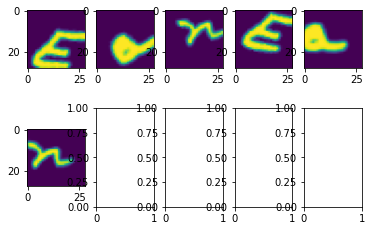

In [7]:
#작성자 전민재
import matplotlib.pyplot as plt
#해독기
mapping=[]
for _ in range(48,58):
    mapping.append(chr(_))
for _ in range(65,91):
    mapping.append(chr(_)) 

for _ in range(97,123):
    mapping.append(chr(_)) 

#출력확인

fig =plt.figure()
rows=2
cols=5
for i in range(10):
    try:
        ax=fig.add_subplot(rows,cols,i+1)
        print(mapping[int(y_new[i])])
        ax.imshow(X_new[i])
    except:
        pass
plt.show()

In [47]:
def dataaugmentation(X):
    datagen=ImageDataGenerator(rotation_range=40,width_shift_range = 0.2, 
        height_shift_range = 0.2)
    #영어 부분 2배 생성
    #차원변환 
    X=tf.reshape(X,[28,28,1])

    #새로운 데이터 생성
    angle=(random.random()%1)*1.4-0.7
    image_result =tfa.image.rotate(X, tf.constant(angle))#rotate -pi/4 ~ pi/4
    shift=(random.random()%1)*8-4
    image_result=tfa.image.translate(image_result,[tf.constant(shift),tf.constant(shift)])
    
    return image_result

In [69]:
ids=10170
tfv=tf.constant(X_valid[ids])
tfv=tf.reshape(tfv,[1,28,28,1])
X_new=dataaugmentation(tfv)

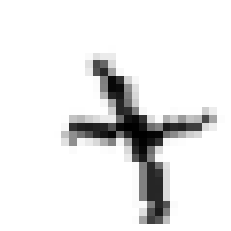

55


In [70]:
import cv2 as cv
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

X_new.shape
c=tf.reshape(X_new,[28,28])

plt.imshow(c, cmap="binary")
plt.axis('off')
plt.show()
print(y_valid[ids])
